## Logistic Regression

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [66]:
df = sns.load_dataset('iris')

In [67]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [69]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [70]:
df_setosa = df[df['species']=='setosa']

In [71]:
df_setosa.drop('species',axis=1).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [72]:
df = df[df['species']!='setosa']

In [73]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [74]:
df['species']=df['species'].map({'vericolor': 0, 'virginica': 1}).fillna(0)

In [75]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0.0
51,6.4,3.2,4.5,1.5,0.0
52,6.9,3.1,4.9,1.5,0.0
53,5.5,2.3,4.0,1.3,0.0
54,6.5,2.8,4.6,1.5,0.0


####  split dataset into independent and dependent features 

In [76]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [79]:
from sklearn.model_selection import GridSearchCV

# Define the corrected parameter grid
parameter = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [1, 2, 3, 4, 5, 6, 8, 10, 20, 30],
    'max_iter': [100, 200, 300],
    'solver': ['saga']  # Optional: Only needed if using 'elasticnet'
}

# Initialize GridSearchCV with the corrected parameters
classifier_regressor = GridSearchCV(
    classifier, 
    param_grid=parameter, 
    scoring='accuracy', 
    cv=5
)

# Fit the model (should now work without errors)
classifier_regressor.fit(X_train, y_train)

C:\Users\soumi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\soumi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\soumi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\soumi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\soumi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 8, 10, 20, 30],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga']},
             scoring='accuracy')

In [81]:
classifier_regressor

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 8, 10, 20, 30],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga']},
             scoring='accuracy')

In [84]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}


In [85]:
print(classifier_regressor.best_score_)

1.0


#### Prediction

In [86]:
y_pred=classifier_regressor.predict(X_test)

#### Accuracy score

In [89]:
from sklearn.metrics import accuracy_score,classification_report

In [90]:
score = accuracy_score(y_pred,y_test)
print(score)

0.88


In [91]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        11
         1.0       1.00      0.79      0.88        14

    accuracy                           0.88        25
   macro avg       0.89      0.89      0.88        25
weighted avg       0.91      0.88      0.88        25



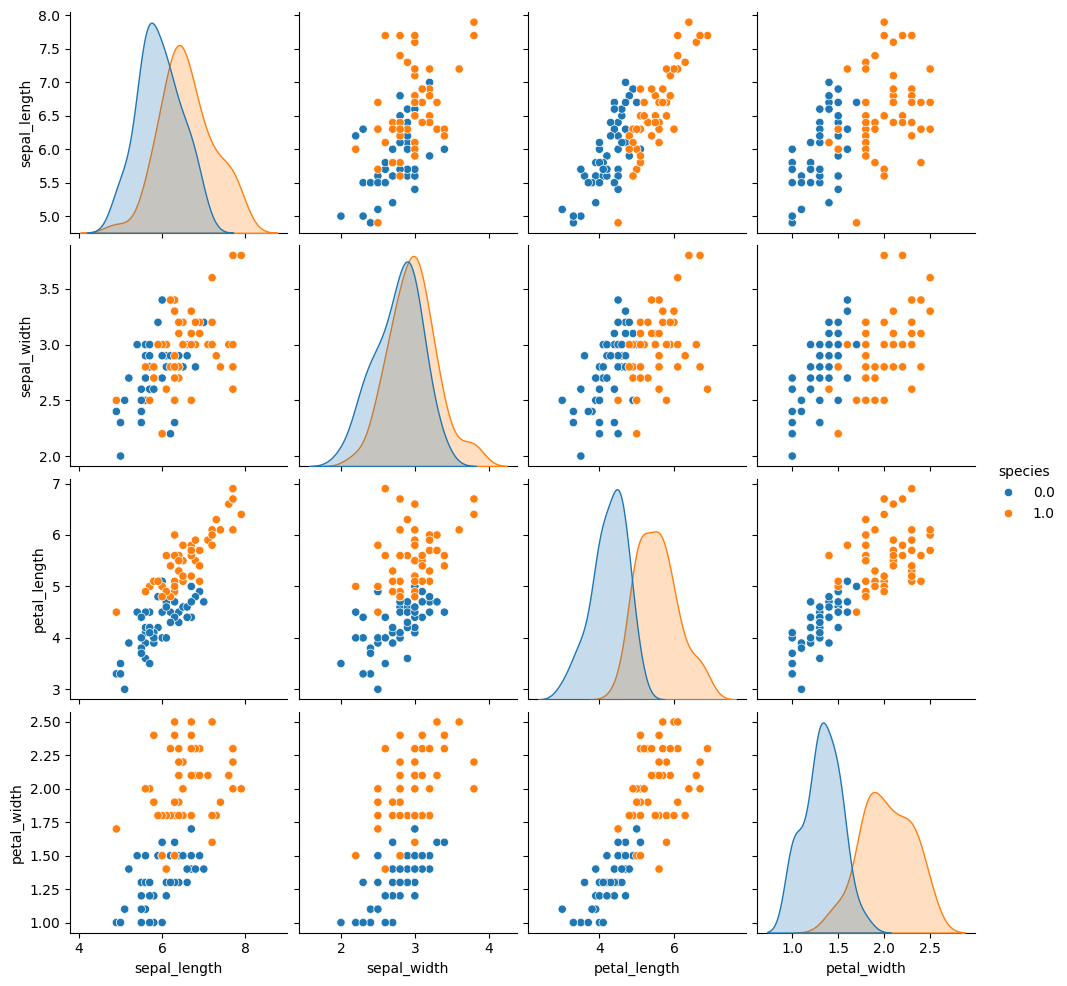

In [92]:
## EDA
sns.pairplot(df,hue='species')

In [93]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000
